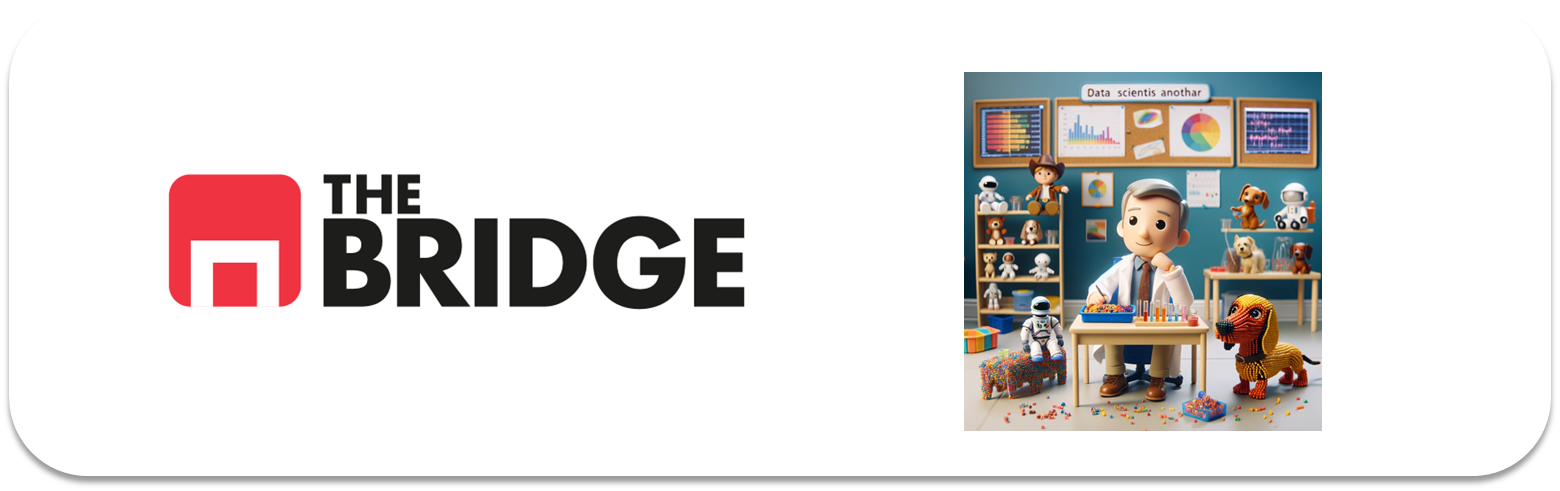

## PRACTICA OBLIGATORIA: **Análisis Univariante**

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [ ]:
# Daniel Mascarilla

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Aparte cargamos el csv

df = pd.read_csv("data/titanic.csv")

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [ ]:
# Daniel Mascarilla

df_titanic = sns.load_dataset('titanic')

print(df_titanic.head())
print(f"\nDimensiones: {df_titanic.shape[0]} filas, {df_titanic.shape[1]} columnas.")

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dimensiones: 891 filas, 15 columnas.


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [ ]:
# Daniel Mascarilla

print(df_titanic.head())

# Muestra la información general del DataFrame
df_titanic.info()

# Podemos observar que hay valores nulos, nos damos cuenta en la columna Non-Null Count

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [ ]:
# Daniel Mascarilla

nulos_porcentaje = (df_titanic.isnull().sum() / len(df_titanic)) * 100
print(nulos_porcentaje[nulos_porcentaje > 0].sort_values(ascending=False))

mediana_edad = df_titanic['age'].median()
df_titanic['age'].fillna(mediana_edad, inplace=True)

moda_puerto = df_titanic['embark_town'].mode()[0]
df_titanic['embark_town'].fillna(moda_puerto, inplace=True)
df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0], inplace=True)

df_titanic.drop(columns=['deck', 'parch'], inplace=True)

print("Verificación de nulos restantes")
print(df_titanic.isnull().sum().sum())

print("Dataframe despues de limpieza")
print(df_titanic.head())

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
dtype: float64
Verificación de nulos restantes
0
Dataframe despues de limpieza
   survived  pclass     sex   age  sibsp     fare embarked  class    who  \
0         0       3    male  22.0      1   7.2500        S  Third    man   
1         1       1  female  38.0      1  71.2833        C  First  woman   
2         1       3  female  26.0      0   7.9250        S  Third  woman   
3         1       1  female  35.0      1  53.1000        S  First  woman   
4         0       3    male  35.0      0   8.0500        S  Third    man   

   adult_male  embark_town alive  alone  
0        True  Southampton    no  False  
1       False    Cherbourg   yes  False  
2       False  Southampton   yes   True  
3       False  Southampton   yes  False  
4        True  Southampton    no   True  


C:\Users\danma\AppData\Local\Temp\ipykernel_1900\2336326607.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['age'].fillna(mediana_edad, inplace=True)
C:\Users\danma\AppData\Local\Temp\ipykernel_1900\2336326607.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


| Columna/Variable | Tipo de Datos | Descripción Breve |
| :--- | :--- | :--- |
| **survived** | `int64` | **Supervivencia** (Variable Objetivo). $0$ = No; $1$ = Sí. |
| **pclass** | `int64` | **Clase de billete** (1, 2, o 3). Indicador del estatus socioeconómico. |
| **sex** | `object` | **Género** del pasajero (male/female). |
| **age** | `float64` | **Edad** del pasajero en años. (Valores nulos imputados con la mediana). |
| **sibsp** | `int64` | Número de **hermanos o cónyuges** a bordo. |
| **fare** | `float64` | **Tarifa** pagada por el billete. |
| **embarked** | `object` | **Inicial de la ciudad de embarque** (C, Q, S). |
| **class** | `category` | **Clase de billete** como texto (First, Second, Third). |
| **who** | `object` | Clasificación de la persona (man, woman, child). |
| **adult\_male** | `bool` | Indicador: `True` si es un hombre adulto. |
| **embark\_town** | `object` | **Nombre completo** de la ciudad de embarque (ej. Southampton). |
| **alive** | `object` | **Supervivencia** como texto (yes/no). |
| **alone** | `bool` | Indicador: `True` si el pasajero viajaba **solo**. |

### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [ ]:
# Daniel Mascarilla

'''
Las tres ciudades
- Southampton
- Cherbourg
- Queenstown
'''

mapeo_ciudades = {
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown (Cobh)'
}

df_titanic['embarked'] = df_titanic['embarked'].replace(mapeo_ciudades)

print(df_titanic[['embarked', 'embark_town']].head())

print("\nConteo de valores en la columna 'embarked'")
print(df_titanic['embarked'].value_counts())

      embarked  embark_town
0  Southampton  Southampton
1    Cherbourg    Cherbourg
2  Southampton  Southampton
3  Southampton  Southampton
4  Southampton  Southampton

Conteo de valores en la columna 'embarked'
embarked
Southampton          646
Cherbourg            168
Queenstown (Cobh)     77
Name: count, dtype: int64


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

C:\Users\danma\AppData\Local\Temp\ipykernel_1900\3872810819.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_titanic, ax=axes[i], palette='deep')
C:\Users\danma\AppData\Local\Temp\ipykernel_1900\3872810819.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_titanic, ax=axes[i], palette='deep')
C:\Users\danma\AppData\Local\Temp\ipykernel_1900\3872810819.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_titanic, ax=axes[i], palette='deep')
C:\Users\danma\AppData\Local\Temp\ipykernel_1900\

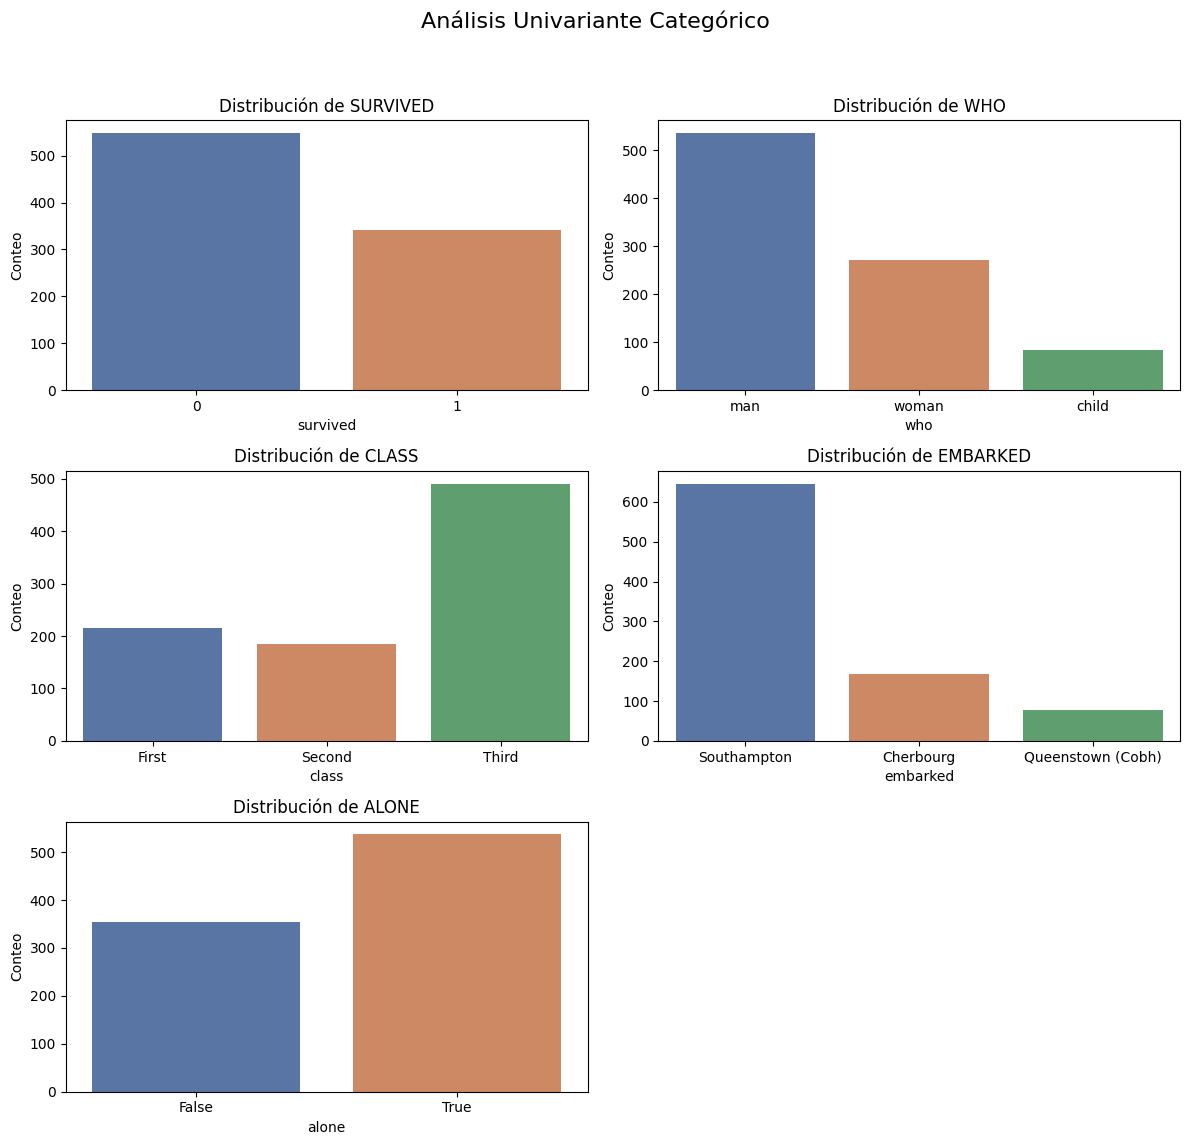

In [ ]:
# Daniel Mascarilla

cat_cols = ["survived", "who", "class", "embarked", "alone"]

# Configuración de gráficas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()
plt.suptitle('Análisis Univariante Categórico', fontsize=16)

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df_titanic, ax=axes[i], palette='deep')
    axes[i].set_title(f'Distribución de {col.upper()}', fontsize=12)
    axes[i].set_ylabel('Conteo')

# Ocultar el último eje no utilizado
axes[5].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### #2.2 Numéricas

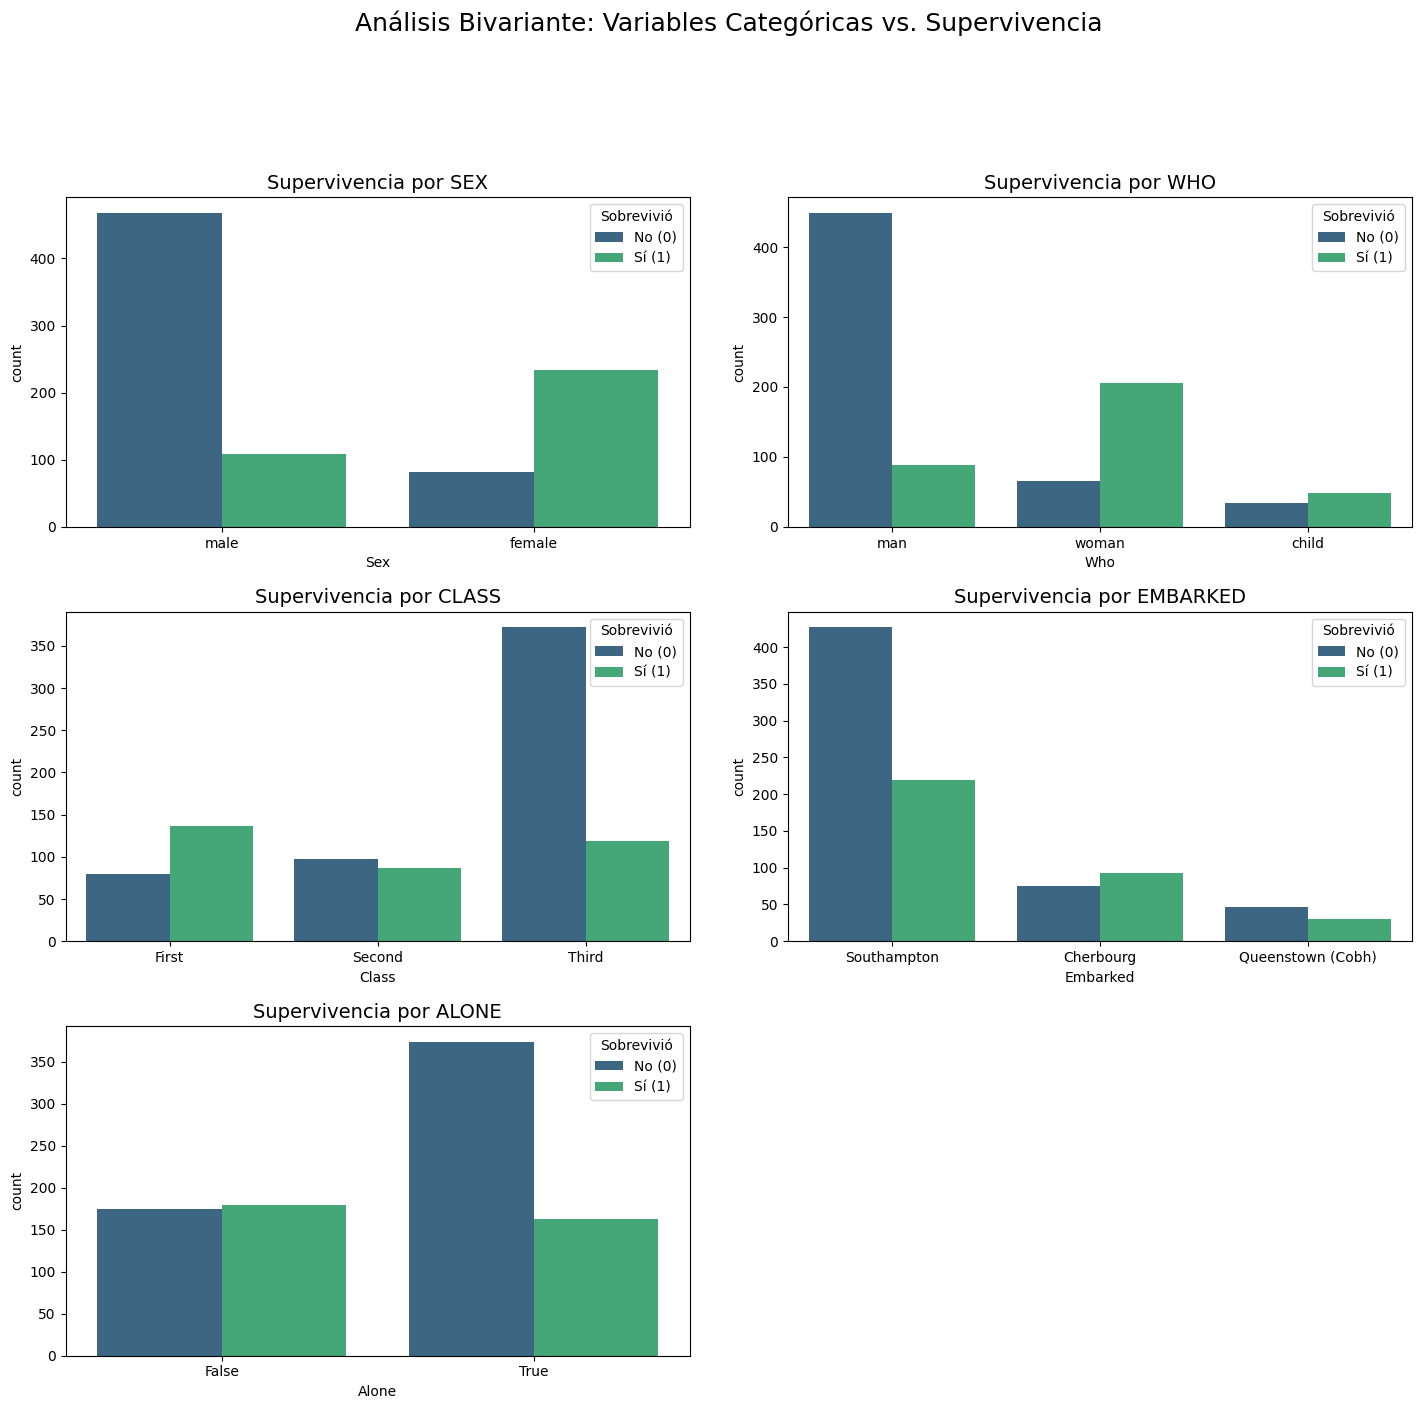

In [ ]:
# Daniel Mascarilla

cat_bivar_cols = ["sex", "who", "class", "embarked", "alone"]

plt.style.use('default')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()
axes[-1].axis('off') # Ocultar el último eje
plt.suptitle('Análisis Bivariante: Variables Categóricas vs. Supervivencia', fontsize=18)
plt.tight_layout(pad=4.0, rect=[0, 0.03, 1, 0.95])

for i, col in enumerate(cat_bivar_cols):
    sns.countplot(x=col, hue='survived', data=df_titanic, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Supervivencia por {col.upper()}', fontsize=14)
    axes[i].set_xlabel(col.capitalize())
    axes[i].legend(title='Sobrevivió', labels=['No (0)', 'Sí (1)'])

plt.show()